In [41]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2020-04-26 09:15:49--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-04-26 09:15:49 (30.3 MB/s) - ‘helper.py’ saved [2813/2813]



##Importing necessary library

In [0]:
import torch 
import helper
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
%matplotlib inline 

import torch.nn as nn
import torch.nn.functional as F
from torch import optim


##Loading Fashion MNIST Dataset

In [0]:
# Define a transform to normalize the data
transform=transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,),(0.5,))])

#Download and prepare train data
trainset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',train=True,transform=transform,download=True)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

#Download and prepare test data
testset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',train=False,transform=transform,download=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

#Visualizing data

torch.Size([64, 1, 28, 28])

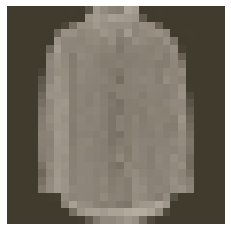

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])
image.shape
 

##Building Neural Network

In [4]:
model=nn.Sequential(nn.Linear(784,256),
                    nn.ReLU(),
                    nn.Linear(256,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.001)

epoch=5
for e in range(epoch):
  running_loss=0
  for image,label in trainloader:
    image=image.view(image.shape[0],-1)

    optimizer.zero_grad()
    #forward pass || backward pass || 
    output=model.forward(image)
    loss=criterion(output,label)
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()
  else:
    print(f'training_loss:{running_loss/len(trainloader)}')



 
 


training_loss:2.2689971552728845
training_loss:2.1601283001238856
training_loss:1.8991085227364417
training_loss:1.4999257078302948
training_loss:1.183472448129898


##Testing by test data

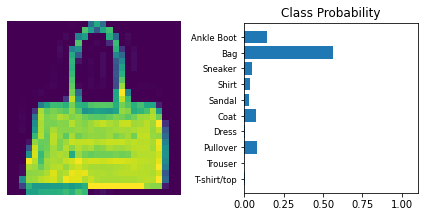

In [6]:
img,lbl=next(iter(testloader))
img=img[0].view(1,-1)


with torch.no_grad():
  logit=model.forward(img)

ps=torch.exp(logit)
helper.view_classify(img.view(1,28,28),ps,version='Fashion')

